<a href="https://colab.research.google.com/github/RiteshopShrivastava/Assignment_6_Logistic_Regression/blob/main/Assignment_6_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Output variable -> y y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")

 Attribute information For bank dataset Input variables: # bank client data:
 
 1 - age (numeric)
 
 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
 
 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) 
 
 4 - education (categorical: "unknown","secondary","primary","tertiary") 
 
 5 - default: has credit in default? (binary: "yes","no") 
 
 6 - balance: average yearly balance, in euros (numeric) 
 
 7 - housing: has housing loan? (binary: "yes","no") 
 
 8 - loan: has personal loan? (binary: "yes","no") # related with the last contact of the current campaign: 
 
 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
 
 10 - day: last contact day of the month (numeric) 
 
 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 
 
 12 - duration: last contact duration, in seconds (numeric) # other attributes: 

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no") 

8-  Missing Attribute Values: None

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [103]:
Bank_data =pd.read_csv('/content/bank-full.csv', delimiter=";")
Bank_data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# ***EDA***

In [104]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [105]:
Bank_data.shape

(45211, 17)

In [106]:
Bank_dummy= pd.get_dummies(Bank_data, columns=['job','marital','education','contact','poutcome'])
Bank_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_admin.           45211 non-null  uint8 
 13  job_blue-collar      45211 non-null  uint8 
 14  job_entrepreneur     45211 non-null  uint8 
 15  job_housemaid        45211 non-null  uint8 
 16  job_

In [107]:
# Binary Encoding of Binary input variables 
Bank_dummy['default'] = np.where(Bank_dummy['default'].str.contains("yes"), 1, 0)
Bank_dummy['housing'] = np.where(Bank_dummy['housing'].str.contains("yes"), 1, 0)
Bank_dummy['loan'] = np.where(Bank_dummy['loan'].str.contains("yes"), 1, 0)
Bank_dummy['y'] = np.where(Bank_dummy['y'].str.contains("yes"), 1, 0)
Bank_dummy


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [108]:
Bank_dummy.month

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: month, Length: 45211, dtype: object

In [109]:
# assigning numbers to month according to their occurance
order = {'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [110]:
Bank = Bank_dummy

In [111]:
Bank= Bank.replace(order)

In [112]:
Bank

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [113]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int64
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

In [114]:
# defining X and Y variable
X= pd.concat([Bank.iloc[:,0:11], Bank.iloc[:,12:]], axis=1)
Y= Bank.iloc[:,11]

# ***Model Building***

In [115]:
classifier = LogisticRegression(max_iter=2500)
classifier.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# ***Model Prediction***

In [116]:
Y_pred = classifier.predict(X)

In [117]:
Y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [118]:
Y_pred_df= pd.DataFrame({'actual': Y, 'predicted_prob':Y_pred })
# or
#Y_pred_df= pd.DataFrame({'actual': Y, 'predicted_prob':classifier.predict(X)})

In [119]:
Y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# ***Testing Model Accuracy***

In [120]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,Y_pred)
print (confusion_matrix)

[[38980   942]
 [ 3571  1718]]


In [121]:
# Accuracy = (a+d)/(a+b+c+d)
(38980+1718)/(38980+942+3571+1718)

0.9001791599389529

In [122]:
#Sensitivity = a/(a+c)
38980/(38980+3571)

0.9160771779746657

In [123]:
#Specificity = d/(b+d)
1718/(942+1718)

0.6458646616541354

Text(0, 0.5, 'True Positive Rate')

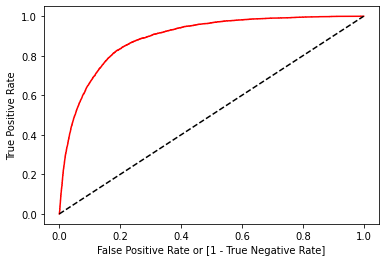

In [124]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, Y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [125]:
# Area under curve
auc

0.6506145482461836